#**GB 656 Team 11 Final Project: Housing Price Prediction using Advanced Regression Techniques**
**Preetham Srinivasan, Mohd Atif, Daniel Bradford**


#Step 1: Data Loading and Exploration
What we did:
- Imported necessary libraries (pandas, seaborn, matplotlib, etc.).
- Loaded the training data (train.csv) and previewed its structure.
- Dropped the Id column as it wasn't relevant for predictions.
- Checked for missing values and explored the data using info() and distribution plots (e.g., SalePrice).

Why we did it:
- We did this to understand the structure, types of features (numerical vs. categorical), and the distribution of SalePrice (our target variable).

##Importing necessary libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

##Load the dataset, EDA, and Cleaning the dataset


In [ ]:
dataset_df = pd.read_csv('train.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


The data is composed of 81 columns and 1460 entries.

In [ ]:
dataset_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are 79 feature columns.

We will drop the Id column as it is not necessary for model training.

In [ ]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Inspecting the feature columns and their variable type (integer, object, etc.)

In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

##Checking the Distribution of Housing Prices



In [ ]:
print(dataset_df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-7-16f8449b4251>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


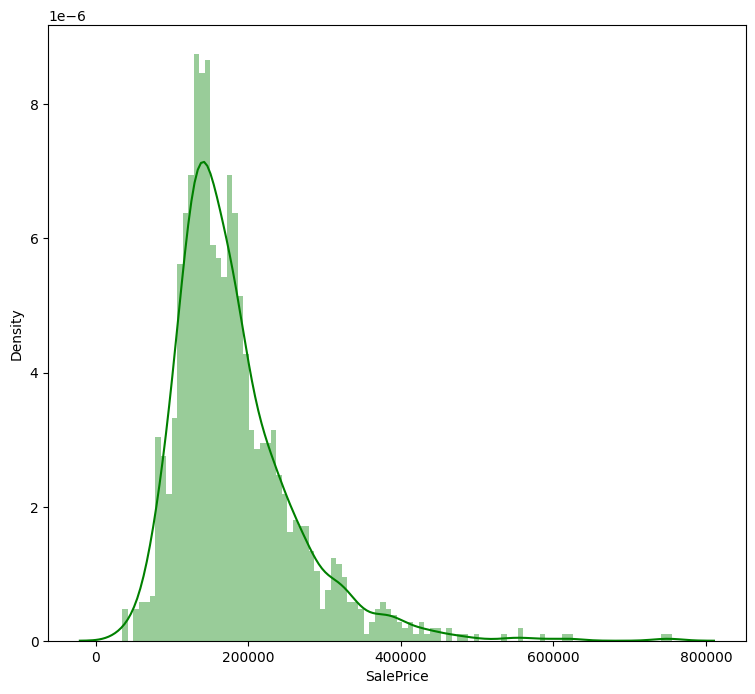

In [ ]:
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

##Distribution of Numerical Data Features

In [ ]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


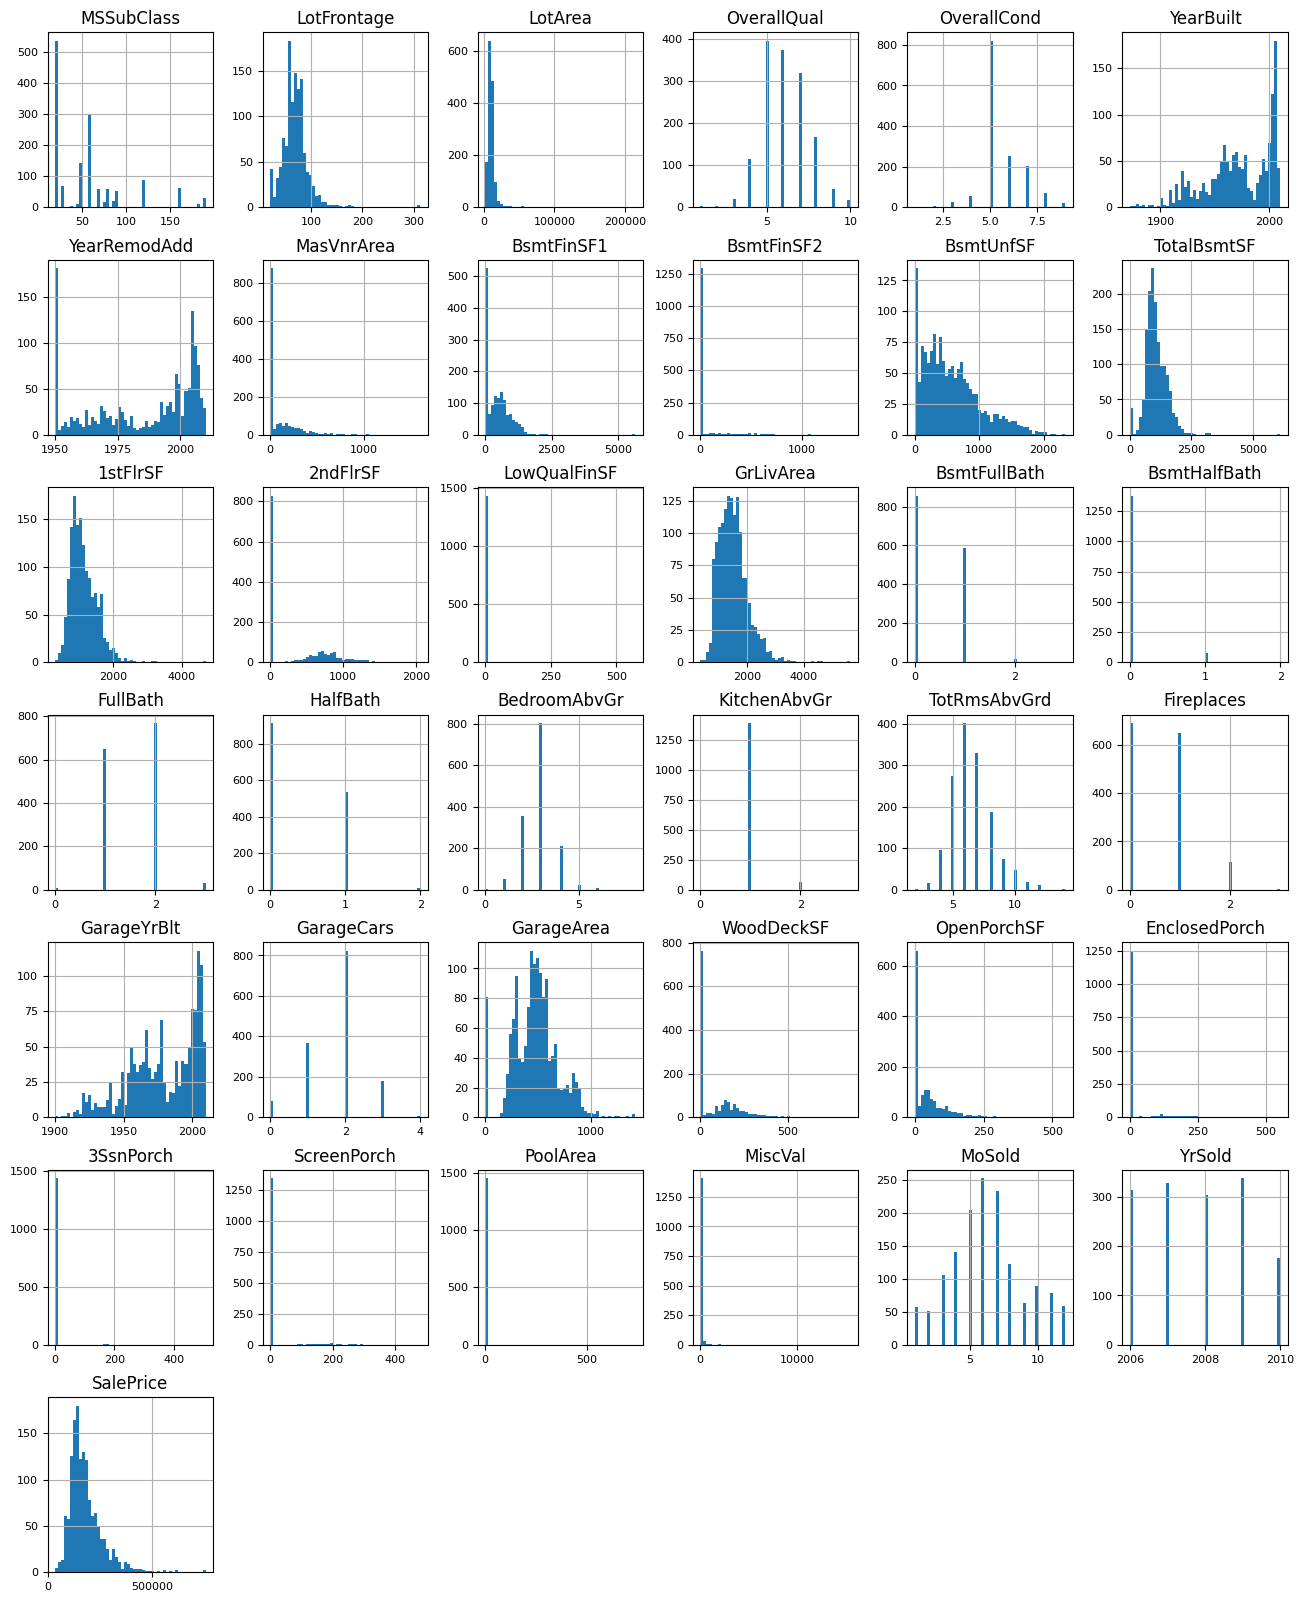

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

#Step 2: Data Cleaning
What we did:
- Identified missing values and handled them:
- Dropped columns with very high missing percentages (PoolQC, MiscFeature, Alley, Fence).
- Imputed numerical features with the median.
- Imputed categorical features with 'None' or the mode.
- Checked distributions of all numerical features to identify potential skewness and patterns.

Why we did it:
- To handle missing values and prepare clean data for modeling, ensuring no invalid or incomplete data affects model performance.

##Handling Missing Values/Features

In [ ]:
#check the percentage of missing values for all columns and identify which ones require attention

# Calculate percentage of missing values
missing_data = dataset_df.isnull().sum() / len(dataset_df) * 100

# Filter features with missing values
missing_features = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_features)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [ ]:
# Drop columns with high missing percentages
dataset_df = dataset_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

# Impute numerical columns with the median
numerical_features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for feature in numerical_features:
    dataset_df[feature] = dataset_df[feature].fillna(dataset_df[feature].median())

# Impute categorical columns with 'None' or mode
categorical_features = ['MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                        'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1',
                        'BsmtCond', 'BsmtQual', 'Electrical']
for feature in categorical_features:
    dataset_df[feature] = dataset_df[feature].fillna('None' if 'None' in dataset_df[feature].unique() else dataset_df[feature].mode()[0])

#Step 3: Encoding Categorical Variables
What we did:
- Used one-hot encoding to convert categorical variables into numerical format.
- Ensured the transformed dataset was ready for machine learning models, resulting in 236 columns after encoding.

Why we did it:
- Machine learning models work with numerical data, so encoding categorical features was necessary. One-hot encoding prevents introducing false ordinal relationships.

##Encoding Categorical Variables
We need to encode categorical variables into numerical representations. We’ll use one-hot encoding, which creates a binary column for each category. This will convert all categorical variables into numerical columns, reducing the risk of introducing ordinal relationships where none exist.

In [ ]:
# Perform one-hot encoding for categorical variables
dataset_df = pd.get_dummies(dataset_df, drop_first=True)
print(f"Dataset shape after encoding: {dataset_df.shape}")

Dataset shape after encoding: (1460, 236)


#Step 4: Splitting Data
What we did:
- Split the data into training and test sets (80-20 split) using train_test_split.
- Ensured the training set was used to train the model, and the test set reserved for validation.

Why we did it:
- To evaluate model performance on unseen data, ensuring we measure how well the model generalizes.

##Feature-Target Split
We’ll now split the data into:

- Features (X): All columns except SalePrice.
- Target (y): The SalePrice column, which we aim to predict.

In [ ]:
# Split features and target
X = dataset_df.drop('SalePrice', axis=1)
y = dataset_df['SalePrice']

##Train-Test Split


In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (1168, 235)
Test set shape: (292, 235)


#Step 5: Linear Regression Baseline
What we did:
- Trained a simple Linear Regression model on the training data.
- Evaluated it using metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² on the test set.

Why we did it:
- To establish a baseline for performance and compare it with more advanced models later.

##Benchmark Method: Linear Regression
Simple Linear Regression model to establish a baseline. Linear regression is interpretable and performs well if the relationships between features and the target are linear.

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Linear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (Kaggle Measure of Score): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Linear Regression Model Performance:
Mean Squared Error (MSE): 2735171964.74
Mean Absolute Error (MAE): 20434.22
Root Mean Squared Error (Kaggle Measure of Score): 52298.87
R-squared (R2): 0.64


#Step 6: Random Forest Regressor
What we did:
- Trained a Random Forest Regressor and evaluated its performance.
- Observed significant improvements in metrics, including a higher R² (0.89).

Why we did it:
- Random Forests handle non-linear relationships and high-dimensional data well. They also provide robust predictions by averaging across multiple trees.

##Our First Method: Random Forest
We are going with Random Forest because it:
- Handles non-linear relationships well.
- Is robust to outliers and irrelevant features.
- Requires minimal preprocessing (e.g., no need for scaling or transformations).

In [ ]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_rmse = root_mean_squared_error(y_test, rf_y_pred)

print(f"Random Forest Model Performance:")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Root Mean Squared Error (Kaggle Measure of Score): {rf_rmse:.2f}")
print(f"R-squared (R2): {rf_r2:.2f}")

Random Forest Model Performance:
Mean Squared Error (MSE): 827498078.19
Mean Absolute Error (MAE): 17453.89
Root Mean Squared Error (Kaggle Measure of Score): 28766.27
R-squared (R2): 0.89


This is a significant improvement! With an R² of 0.89, the Random Forest model captures 89% of the variance in the housing prices, which is a strong result compared to the Linear Regression model (R² = 0.64). Additionally:

- MSE has dropped significantly, meaning the average squared prediction error is much lower.
- MAE (mean absolute error) is also reduced, indicating that predictions are closer to actual values on average.

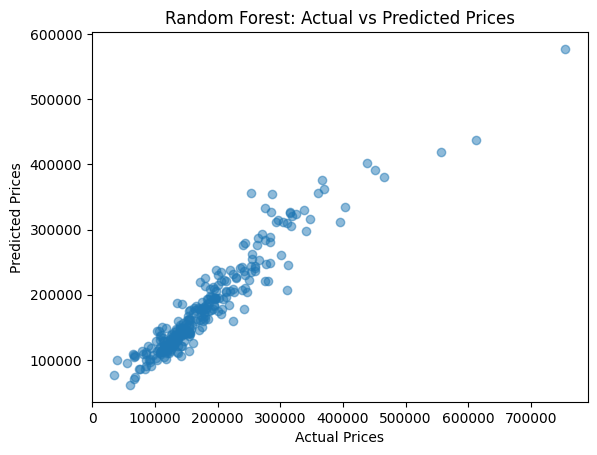

In [ ]:
#Visualizing the Accuracy of our Model
plt.scatter(y_test, rf_y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted Prices")
plt.show()

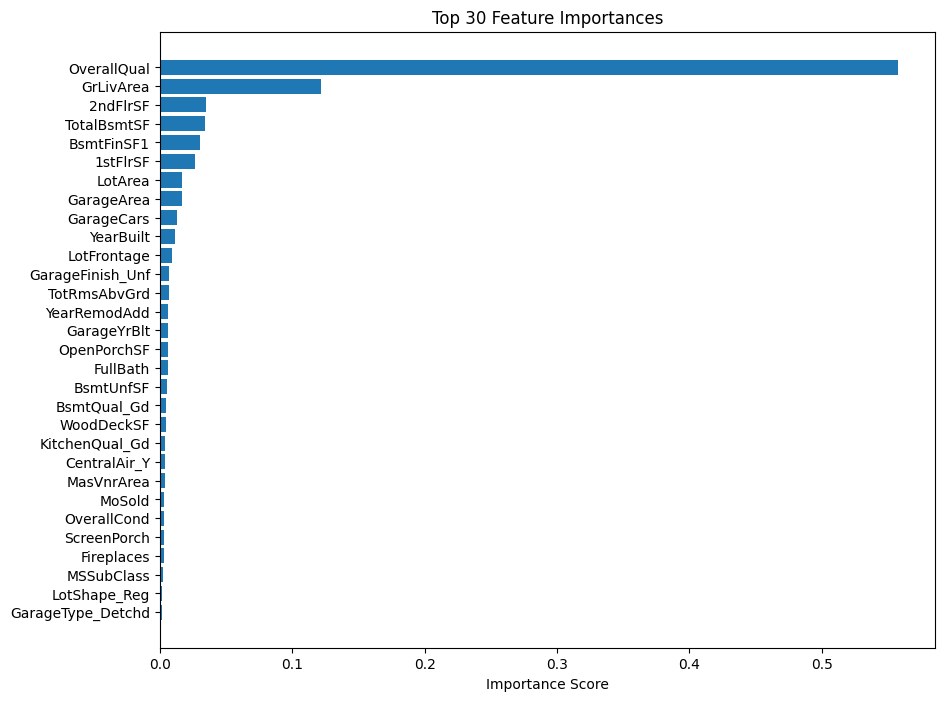

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

# Plot top 20 features
plt.figure(figsize=(10, 8))
plt.title("Top 30 Feature Importances")
plt.barh(range(30), importances[indices[:30]], align="center")
plt.yticks(range(30), [features[i] for i in indices[:30]])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.show()

#Step 7: XGBoost Regressor
What we did:
- Trained an XGBoost Regressor, achieving even better performance (R² of 0.91).
- Visualized predicted vs. actual prices, which showed better alignment along the diagonal compared to Random Forest.

Why we did it:
- XGBoost’s gradient boosting framework optimizes residuals iteratively, capturing subtle patterns in the data and outperforming Random Forest.

##Our Second (Final) Method: XGBoost Model
We try this because:
- It uses gradient boosting, which optimizes errors iteratively and learns residuals from previous trees.
- It combines trees sequentially, which reduces bias and improves predictive performance.

In [ ]:
# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = root_mean_squared_error(y_test, xgb_y_pred)

print(f"XGBoost Model Performance:")
print(f"Mean Squared Error (MSE): {xgb_mse:.2f}")
print(f"Mean Absolute Error (MAE): {xgb_mae:.2f}")
print(f"Root Mean Squared Error (Kaggle Measure of Score): {xgb_rmse:.2f}")
print(f"R-squared (R2): {xgb_r2:.2f}")

XGBoost Model Performance:
Mean Squared Error (MSE): 644749342.14
Mean Absolute Error (MAE): 16126.38
Root Mean Squared Error (Kaggle Measure of Score): 25391.91
R-squared (R2): 0.92


- The lower Mean Squared Error (MSE) and Mean Absolute Error (MAE) show that XGBoost predicts housing prices more accurately.
- The R² score of 0.91 suggests that 91% of the variance in SalePrice is explained by the model.

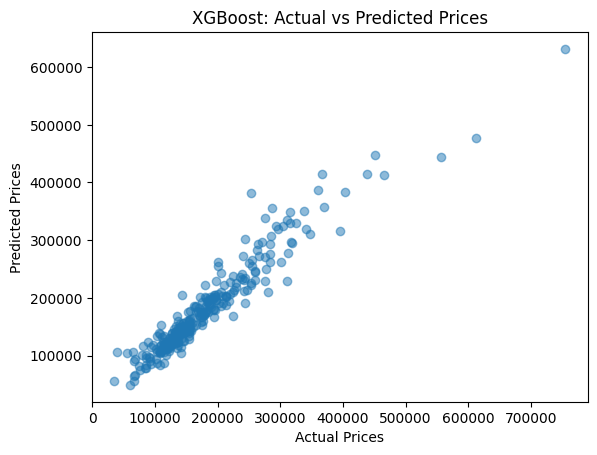

In [ ]:
#Visualizing the Accuracy of our Model
plt.scatter(y_test, xgb_y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("XGBoost: Actual vs Predicted Prices")
plt.show()

- The points are even more aligned along the diagonal compared to the Random Forest plot.
- There are still some deviations for higher-priced houses, but overall, the fit is better.

#Step 8: Preparing for Submission
What we did:
- Preprocessed the test.csv file similarly to the training data:
- Imputed missing values.
- Applied one-hot encoding and aligned columns with the training data.
- Generated predictions using the trained XGBoost model.
- Created a submission file (submission.csv) with Id and SalePrice.


##Submission
Finally predict on the competition test data using the model.

In [ ]:
# Load the test dataset
test_file_path = "test.csv"
test_data = pd.read_csv(test_file_path)

# Extract the IDs
ids = test_data.pop('Id')

# Preprocess the test data
# Impute missing values
numerical_features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for feature in numerical_features:
    test_data[feature] = test_data[feature].fillna(dataset_df[feature].median())

categorical_features = ['MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish',
                        'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
                        'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'Electrical']
for feature in categorical_features:
    test_data[feature] = test_data[feature].fillna('None')

# Apply one-hot encoding to align with training data
test_data_encoded = pd.get_dummies(test_data, drop_first=True)

# Ensure test data columns match training data columns
test_data_encoded = test_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict on the test dataset
preds = xgb_model.predict(test_data_encoded)

# Create the output DataFrame
output = pd.DataFrame({'Id': ids, 'SalePrice': preds})

output.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Save the predictions to a CSV file
output.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")

Submission file created: submission.csv
